> **Data Description**

79개의 변수 → 미국 아이오와 주의 에임스(Ames) 지방의 주택 가격 정보

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale   
   
   

- 성능 평가는 앞의 자전거 대여 예측 예제와 동일한 RMSLE(Root Mean Squared Log Error)를 기반
- 가격이 비싼 주택일수록 예측 결과 오류가 전체 오류에 미치는 비중이 높음

    ⇒ 이것을 상쇄하기 위해 오류 값을 로그 변환한 RMSLE 이용

## 1. 데이터 사전 처리(Preprocessing)

In [68]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('data/house_price_train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [69]:
print('데이터 세트의 Shape: ', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 Shape:  (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


- 피처의 타입은 숫자형은 물론 문자형도 많음
- 데이터 양에 비해 Null 값이 많은 피처도 있음   
    ⇒Null 값이 너무 많은 피처는 드롭하자

- 회귀 모델을 적용하기 전에 타깃 값의 분포도가 정규 분포인지 확인

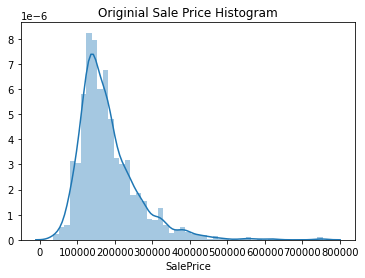

In [70]:
plt.title('Originial Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

- 데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태로, 정규 분포에서 벗어나 있음
    - 정규 분포 형태로 변환하기 위해 로그 변환(Log Transformation)을 적용
    - 넘파이의 log1p()를 이용해 로그 변환한 결과값을 기반으로 학습한 뒤, 예측 시에는 다시 결과값을 expm1()으로 추후에 환원하면 됨

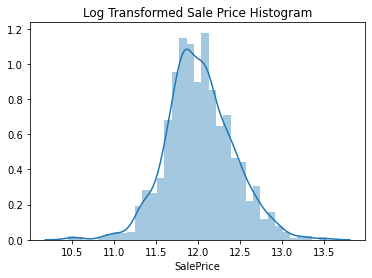

In [71]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

- Null 값이 많은 피처인 PoolQC, MiscFeature, Alley, Fence, FireplaceQu와 단순 식별자인 Id 칼럼 삭제
- LotFrontage는 Null 값이 259개로 비교적 많으나 평균값으로 대체
- 나머지 Null 피처는 Null 값이 많지 않으므로 숫자형의 경우 평균값으로 대체

In [72]:
# SalePrice 로그 변환
originial_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# 드롭하지 않은 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

In [73]:
# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type \n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


- 이제 문자형 피처를 제외하고는 Null 값 없음
- 문자형 피처는 모두 원-핫 인코딩으로 변환 → get_dummies()
    - get_dummies()는 자동으로 문자열 피처를 원-핫 인코딩 변환하면서 Null 값은 'None' 칼럼으로 대체 ⇒ **별도의 Null 값 대체하는 로직 필요 X**

In [74]:
print('get_dummies() 수행 전 데이터 Shpae:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shpae:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]
print('## Null 피처의 Type: \n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shpae: (1460, 75)
get_dummies() 수행 후 데이터 Shpae: (1460, 271)
## Null 피처의 Type: 
 Series([], dtype: object)


## 2. 선형 회귀 모델 학습/예측/평가

- 앞에서 예측 평가는 RMSLE(즉, 실제 값과 예측 값의 오류를 로그 변환한 뒤 RMSE 적용)를 이용한다했는데 이미 타깃 값인 SalePrice가 로그 변환 됨
- 예측값 역시 로그 변환된 SalePrice 값을 기반으로 예측하므로 원본 SalePrice 예측값의 로그 변환 값
- 실제 값도 로그 변환 됐고, 예측값도 이를 반영한 로그 변환 값이므로 예측 결과 오류에 RMSE만 적용하면 RMSLE가 자동으로 측정됨

In [75]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return np.round(rmses, 3)

- get_rmse(model)은 단일 모델의 RMSE 값을, get_rmses(model)는 get_rmse()를 이용해 여러 모델의 RMSE 값을 반환

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.128
Lasso 로그 변환된 RMSE:  0.176


array([0.132, 0.128, 0.176])

- 라쏘 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과

    ⇒ 최적 하이퍼 파라미터 튜닝이 필요해 보임

    ⇒ alpha 하이퍼 파라미터 최적화를 릿지와 라쏘 모델에 대해 수행해보자

- 먼저 피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인해보자
    - 피처가 많으니 피처 계수 값의 상위 19개, 하위 10개의 피처명과 그 회귀 계수 값을 가지는 판다스 Series 객체 반환

In [77]:
def get_top_bottom_coef(model, n=10):
    # coef_속성을 기반으로 Series 객체 생성, index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

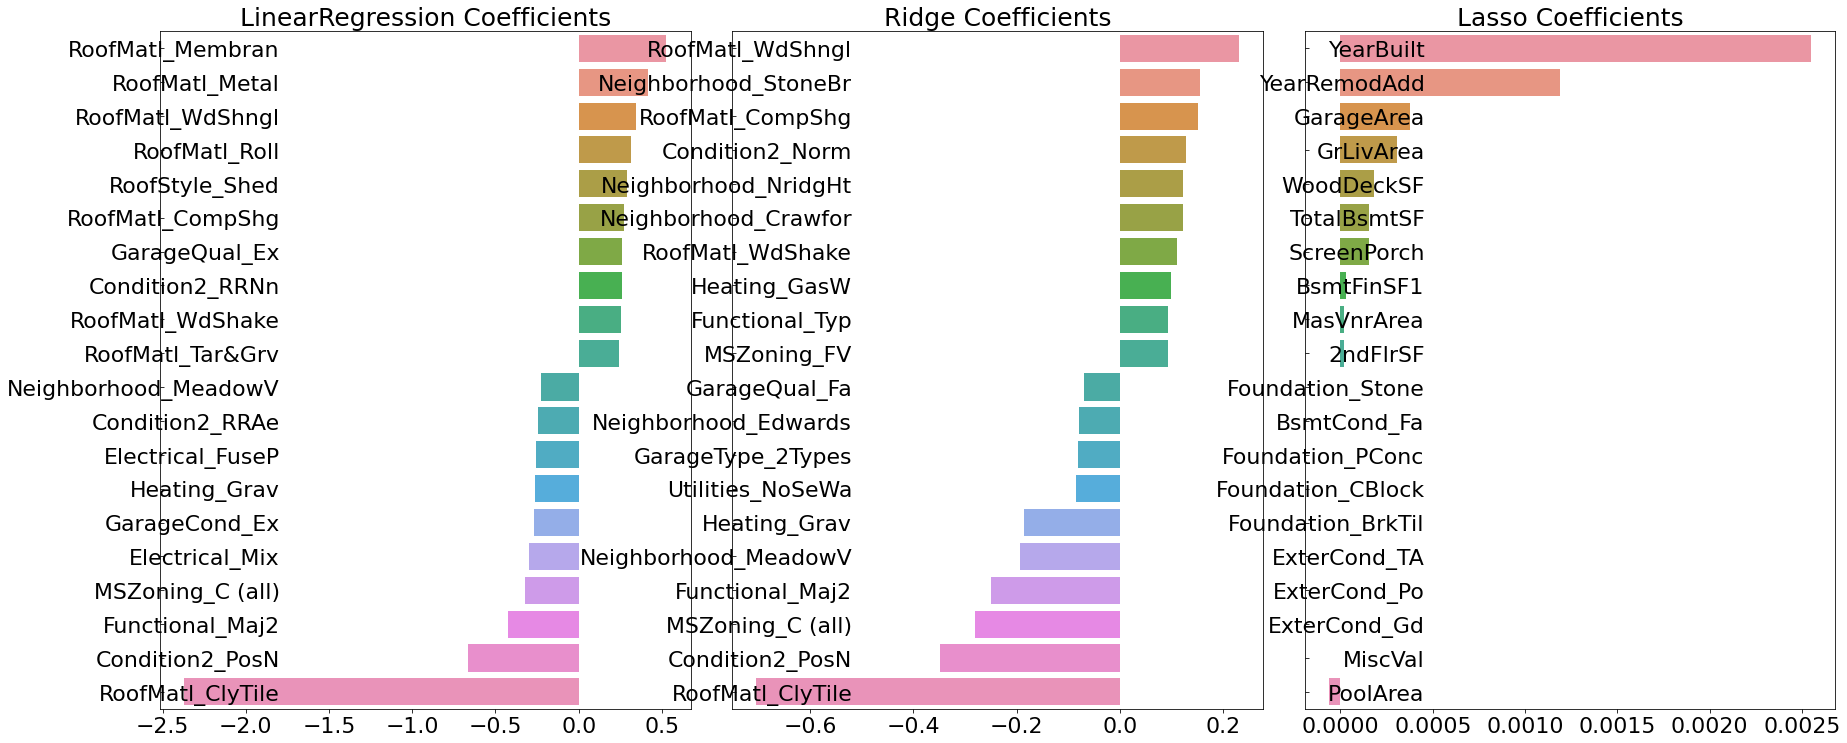

In [78]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    # 입력 인자로 받은 list 객체인 models를 차례롤 model을 추출해 회귀 계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        # ax subplot에 barchar로 표현
        # 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

*tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)*:   
- 자동으로 명시된 여백(padding)에 관련된 서브플롯 파라미터를 조정
- 모든 키워드 인자는 선택적으로 입력 가능하며, 입력 없이 사용할 경우 기존에 세팅된 기본값을 이용하여 자동으로 레이아웃 설정

    - pad (float type): figure의 모서리와 서브플롯의 모서리 사이의 여백을 설정, 입력값은 폰트 크기와 여백간의 분율로 기본값은 1.08
    - h_pad, w_pad (float type): 서로 인접한 서브플롯의 모서리간의 높이 및 너비의 여백 설정, h_pad는 높이 여백을, w_pad는 너비의 여백을 설정하며 기본값은 None
    - rect (tuple(left, bottom, right, top)): 서브 플롯을 넣기 위한 사각형 설정하며(왼쪽, 바닥, 오른쪽, 위)의 값을 입력 받음. 입력되는 값은 figure의 총 크기대로 정규화된 값으로 기본값은 (0,0,1,1)

- 모델별 회귀 계수를 보면 OLS 기반의 LinearRegression과 Ridge의 경우는 회귀 계수가 유사한 형태로 분포돼있음
- 하지만 라쏘는 전체적으로 회귀 계수 값이 매우 작고, 그중에 YearBuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작음

    ⇒ 라쏘의 경우 두 개의 모델과 다른 회귀 계수 형태

- 혹시 학습 데이터의 데이터 분할에 문제가 있어서 그런 것인지, 이번에는 학습과 테스트 데이터 세트를 분할하지 않고 전체 데이터 세트를 5개의 교차 검증 폴드 세트로 분할해 평균 RMSE를 측정해보자

In [79]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        # 모델별 CV RMSE값과 평균 RMSE값 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                            scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))
        
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


- 여전히 라쏘의 경우가 OLS 모델이나 릿지 모델보다 성능이 떨어짐
- 릿지와 라쏘 모델에 대해 alpha 하이퍼 파라미터를 변화시키면서 최적 값 도출해보자
- 앞으로 모델별로 최적화 하이퍼 파라미터 작업을 반복적으로 진행하므로 이를 위한 별도의 함수 생성
    - print_best_params(model, params)는 모델과 하이퍼 파라미터 딕셔너리 객체를 받아 최적화 작업의 결과를 표시하는 함수

In [80]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('\n{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha: {'alpha': 12}

Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha: {'alpha': 0.001}


- 라쏘 모델의 경우 alpha 값 최적화 이후 예측 성능이 많이 좋아졌음
- 선형 모델에 최적 alpha 값을 설정한 뒤, train_test_split()으로 분할된 학습 데이터와 테스트 데이터를 이용해 학습/예측/평가를 수행하고, 모델별 회귀 계수를 시각화 해보자

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


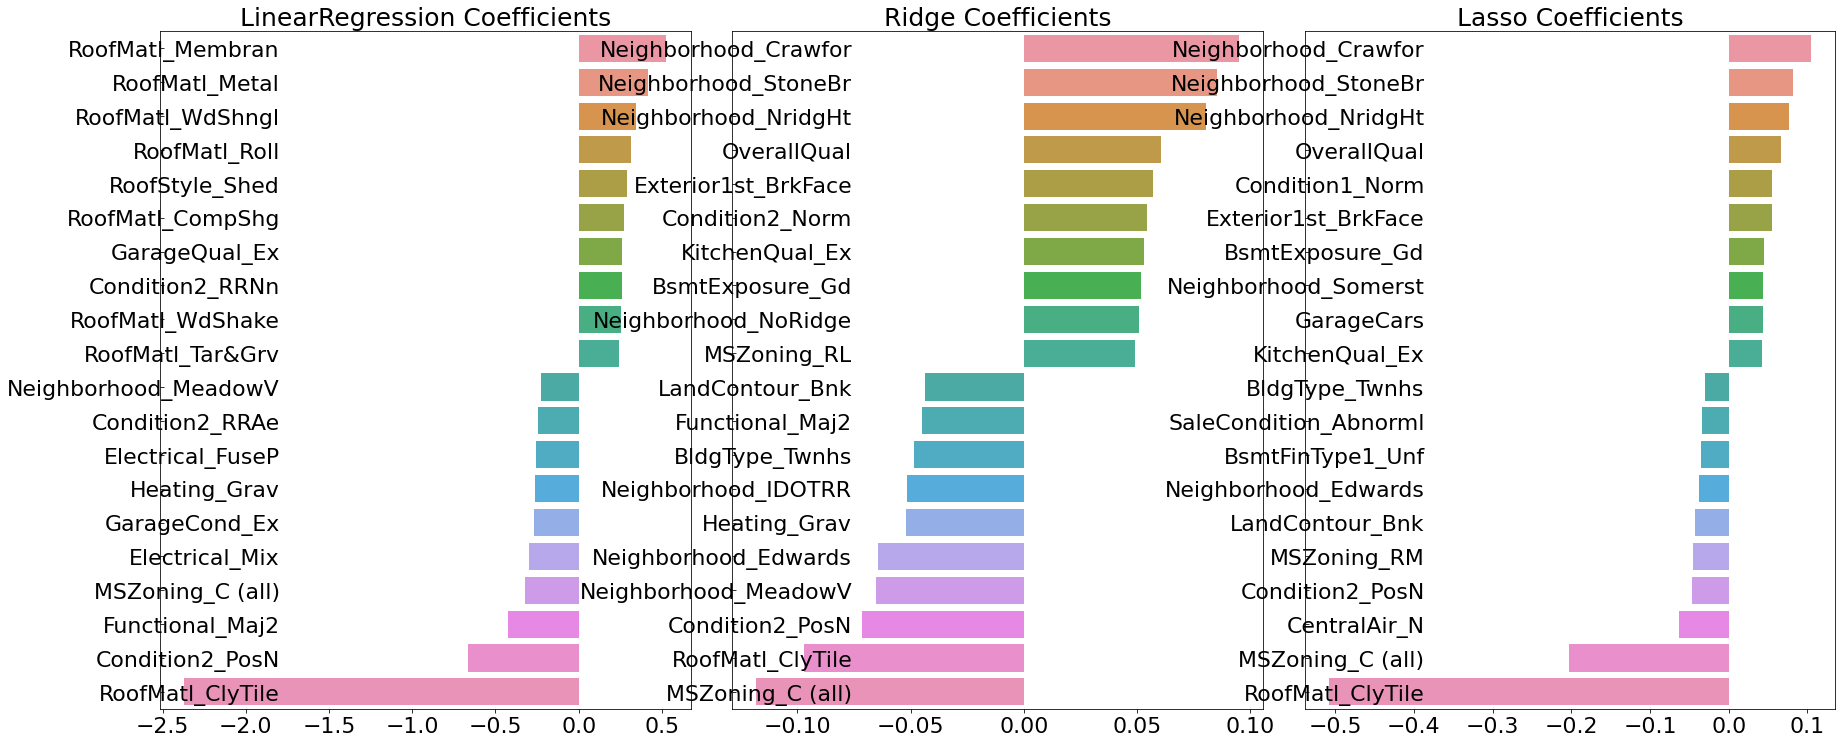

In [81]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- alpha 값 최적화 후 테스트 데이터 세트의 예측 성능이 더 좋아짐
- 모델별 회귀 계수도 많이 달라짐 → 기존에는 라쏘 모델의 회귀 계수가 나머지 두 개 모델과 많은 차이가 있었지만, 이번엔 릿지와 라쏘 모델에서 비슷한 피처의 회귀 계수가 높음
- 다만 라쏘 모델의 경우는 릿지에 비해 동일한 피처라도 회귀 계수 값이 상당히 작음

- 데이터 세트를 추가적으로 가공해서 모델 튜닝을 좀 더 진행해보자
    1. 피처 데이터 세트의 데이터 분포도 확인
    2. 이상치(Outlier) 데이터 처리   
       
    

[1. 피처 데이터 세트의 데이터 분포도 확인]   


- 피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있음
- 모든 숫자형 피처의 데이터 분포도를 확인해 분포도가 어느 정도로 왜곡됐는지 알아보자
    - 사이파이의 stats 모듈의 skew() 함수를 이용해 칼럼의 데이터 세트의 왜곡된 정도를 쉽게 추출할 수 있음

    - skew() 함수의 반환 값이 1 이상인 경우를 왜곡 정도가 높다고 판단하지만, 상황에 따라 편차는 있음
        - 여기선 1 이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완화하기 위해 로그 변환 적용
    - ❗주의❗ skew()를 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외해야 함
        - 카테고리 피처는 코드성 피처이므로 인코딩 시 당연히 왜곡된 가능성이 높음(예를 들어 '화장실 여부'가 1로 1000건, 0으로 10건이 될 수 있지만, 이는 왜곡과는 무관)
        - 따라서 skew() 함수를 적용하는 DataFrame은 원-핫 인코딩이 적용되지 않은 house_df이어야 함

In [82]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 칼럼 index를 []로 입력
# apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x:skew(x))

# skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


- 추출된 왜곡 정도가 높은 피처를 로그 변환

In [83]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [84]:
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 칼럼 index를 []로 입력
# apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x:skew(x))

# skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


- 로그 변환 후 이 피처들의 왜곡 정도를 다시 확인해 보면 여전히 높은 왜곡 정도를 가진 피처가 있지만, 더 이상 로그 변환을 하더라도 개선하기는 어렵기에 그대로 유지
- house_df의 피처를 일부 로그 변환했으므로 다시 원-핫 인코딩 적용한 house_df_ohe 만들고 데이터 세트 분리한 후, print_best_params() 함수를 이용해 최적 alpha 값과 RMSE 출력

In [85]:
# 다시 원-핫 인코딩 적용하고 피처/타깃 데이터 생성
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2,
                                                   random_state=156)

# 다시 최적화 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha: {'alpha': 10}

Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha: {'alpha': 0.001}


- 릿지 모델의 최적 alpha 값이 10으로 변경됐고, 두 모델 모두 피처의 로그 변환 이전과 비교해 5폴드 교차 검증의 평균 RMSE 값이 향상됨

LinearRegression 로그 변환된 RMSE:  0.128
Ridge 로그 변환된 RMSE:  0.122
Lasso 로그 변환된 RMSE:  0.119


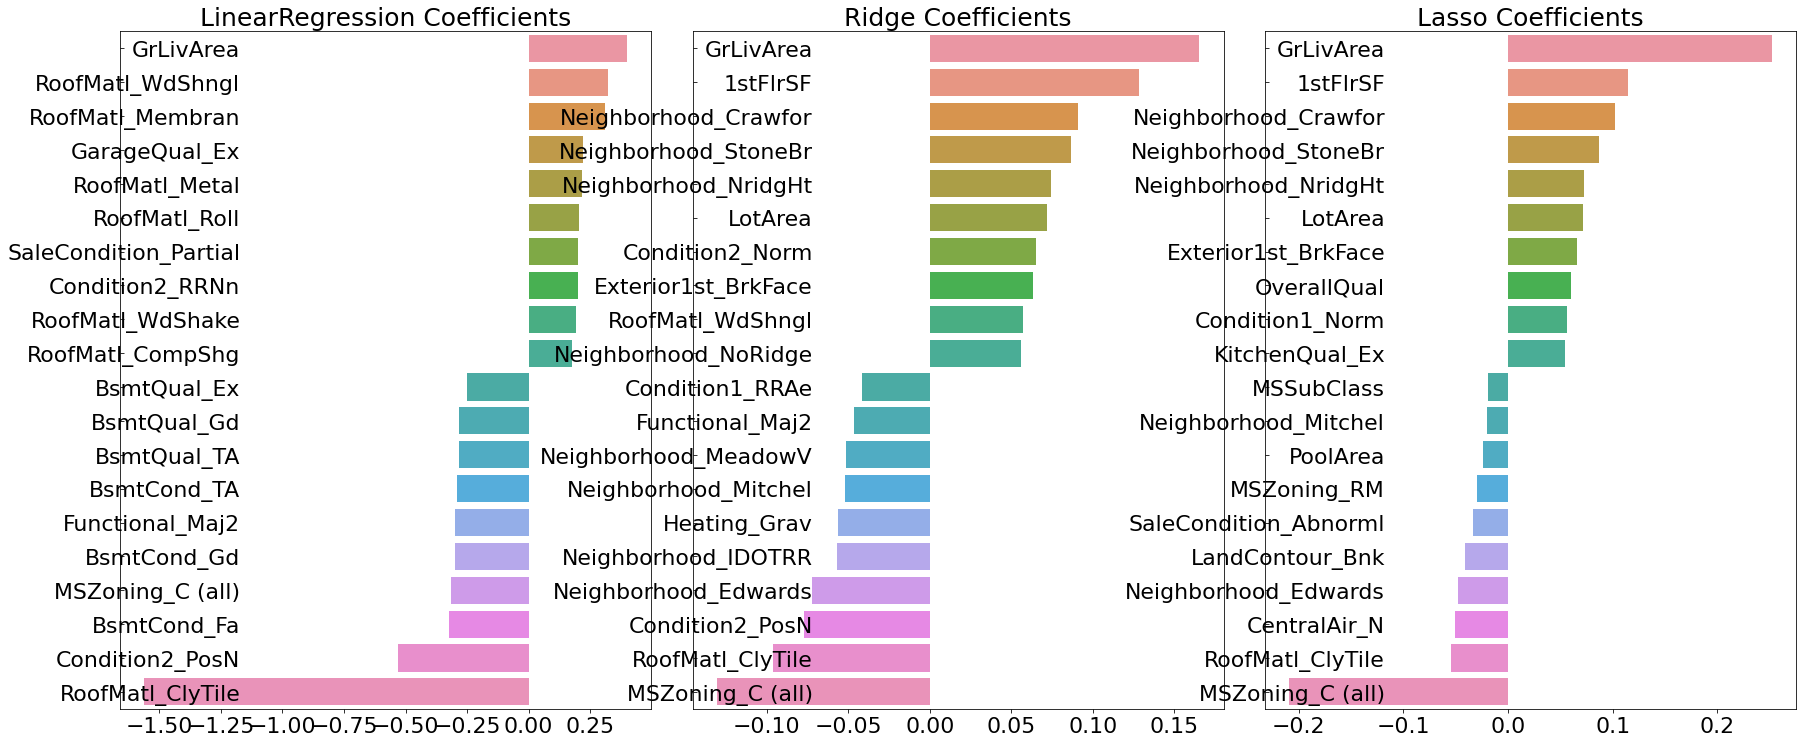

In [86]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 다시 모델별 회귀 계수를 시각화한 결과, 세 모델 모두 GrLivArea, 즉 주거 공간 크기가 회귀 계수가 가장 높은 피처가 됨
    - 주거 공간의 크기가 주택 가격에 미치는 영향이 당연히 제일 높은 것이라는 상식선에서의 결과가 이제야 도출됨

[2. 이상치(Outlier) 데이터 처리]

- 회귀 계수가 높은 피처, 즉 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터의 처리가 특히 중요!
- 먼저 세 개 모델 모두에서 가장 큰 회귀 계수를 가지는 GrLivArea 피처의 데이터 분포를 살펴보자

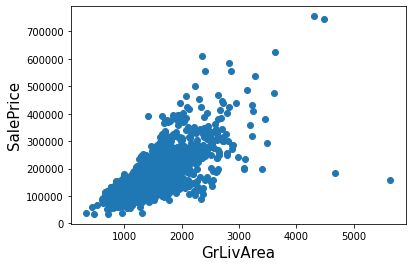

In [87]:
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

- 일반적으로 주거 공간이 큰 집일수록 가격이 비싸기 때문에 GrLivArea 피처는 SalePrice와 양의 상관도가 매우 높음을 직관적으로 알 수 있음
- 하지만 위 그림에서 오른쪽 2개의 데이터는 일반적인 두 변수 간의 관계에서 너무 어긋나 있음
    - GrLivArea가 가장 큰 데도 불구하고 가격이 매우 낮음
    - GrLivArea가 4000평방비트 이상임에도 가격이 500,000달러 이하인 데이터는 모두 이상치로 간주하고 삭제

In [88]:
# GrLivArea와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index: ', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shpae: ', house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shpae: ', house_df_ohe.shape)

이상치 레코드 index:  [ 523 1298]
이상치 삭제 전 house_df_ohe shpae:  (1460, 271)
이상치 삭제 후 house_df_ohe shpae:  (1458, 271)


In [89]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2,
                                                   random_state=156)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha: {'alpha': 8}

Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha: {'alpha': 0.001}


- 단 두 개의 이상치 데이터만 제거했는데 예측 수치가 매우 크게 향상됨
- 릿지 모델의 경우 최적 alpha 값은 12에서 8로 변했고, 두 모델 모두 평균 RMSE가 개선됨
- GrLivArea 속성이 회귀 모델에서 차지하는 영향도가 크기에 이 이상치를 개선하는 것이 성능 개선에 큰 의미를 가졌음

- 이상치를 찾는 것은 쉽지 않지만, 회귀에 중요한 영향을 미치는 피처를 위주로 이상치 데이터를 찾으려는 노력은 중요!
- 보통 머신러닝 프로세스 중에서 데이터의 가공은 알고리즘을 적용하기 이전에 수행하지만 이것이 머신러닝 알고리즘을 적용하기 이전에 완벽하게 데이터의 선처리 작업을 수행하라는 의미는 아님
- 일단 대략의 데이터 가공과 모델 최적화를 수행한 뒤, 다시 이에 기반한 여러 가지 기법의 데이터 가공과 하이퍼 파라미터 기반의 모델 최적화를 반복적으로 수행하는 것이 바람직한 머신러닝 모델 생성 과정!

- 아래는 이상치 데이터 제거 후 RMSE 수치 및 회귀 계수 시각화한 결과

LinearRegression 로그 변환된 RMSE:  0.129
Ridge 로그 변환된 RMSE:  0.103
Lasso 로그 변환된 RMSE:  0.1


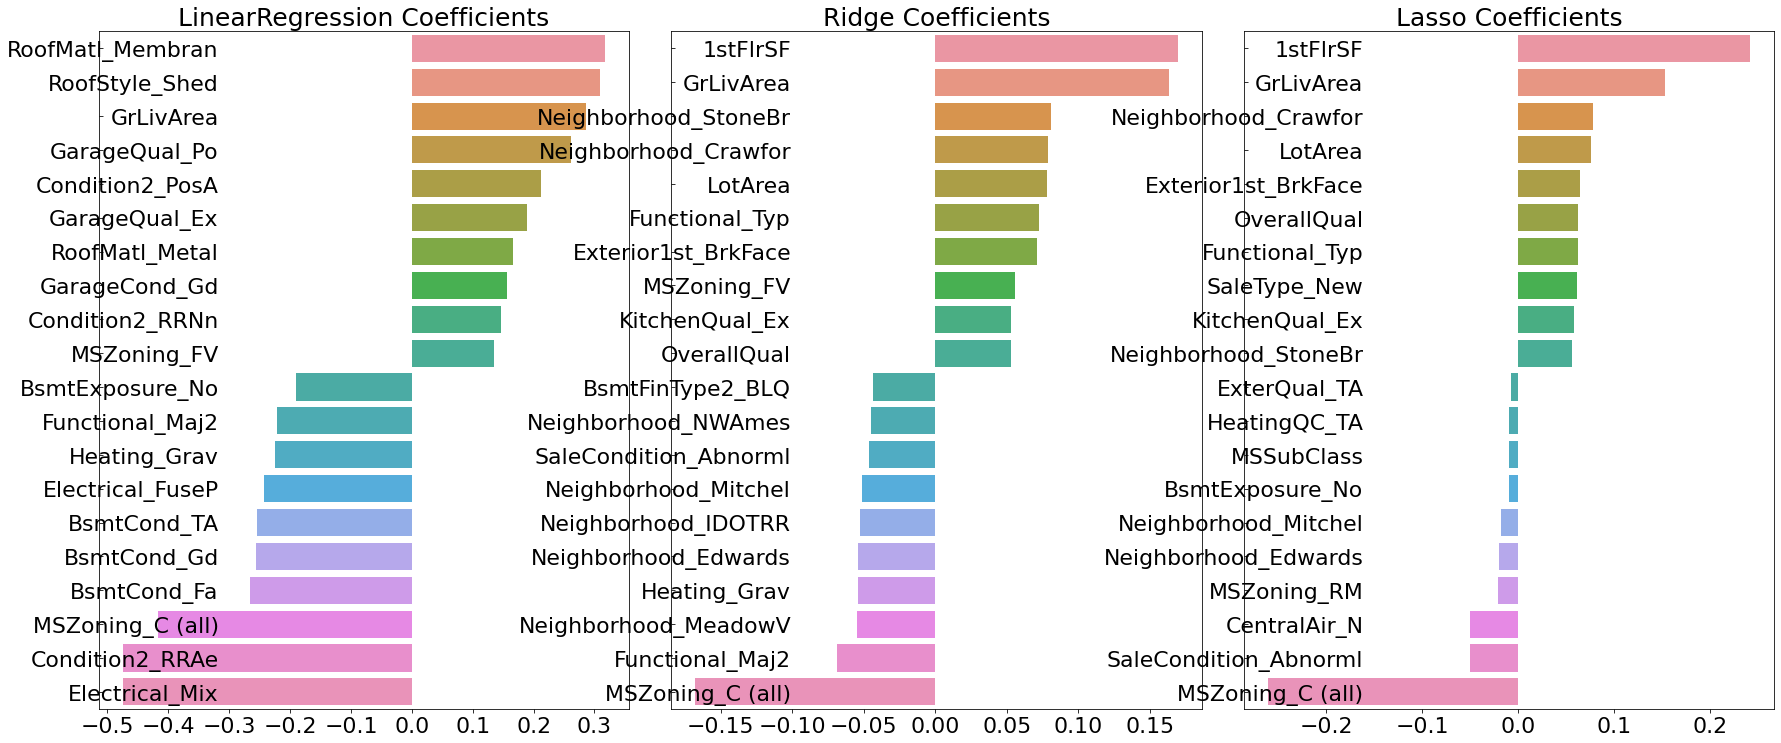

In [93]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 3. 회귀 트리 모델 학습/예측/평가

- 이번엔 회귀 트리를 이용해 회귀 모델을 만들어 보자

- XGBoost, LightGBM 모두 수행 시간이 오래 걸릴 수 있는 관계로 다음과 같은 하이퍼 파라미터 설정을 미리 적용한 상태로 5 폴드 세트에 대한 평균 RMSE 값 구함

In [91]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)


XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1178, 최적 alpha: {'n_estimators': 1000}


In [92]:
from lightgbm import LGBMRegressor

lgbm_params ={'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=1)
print_best_params(lgbm_reg, lgbm_params)


LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1165, 최적 alpha: {'n_estimators': 1000}


In [97]:
# xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
# xgb_reg.fit(X_train, y_train)
# xgb_pred = xgb_reg.predict(X_test)
# xgb_mse = mean_squared_error(y_test, xgb_pred)
# xgb_rmse = np.sqrt(xgb_mse)

# lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
# lgbm_reg.fit(X_train, y_train)
# lgbm_pred = lgbm_reg.predict(X_test)
# lgbm_mse = mean_squared_error(y_test, lgbm_pred)
# lgbm_rmse = np.sqrt(lgbm_mse)

- 모델의 피처 중요도를 시각화 해 보자

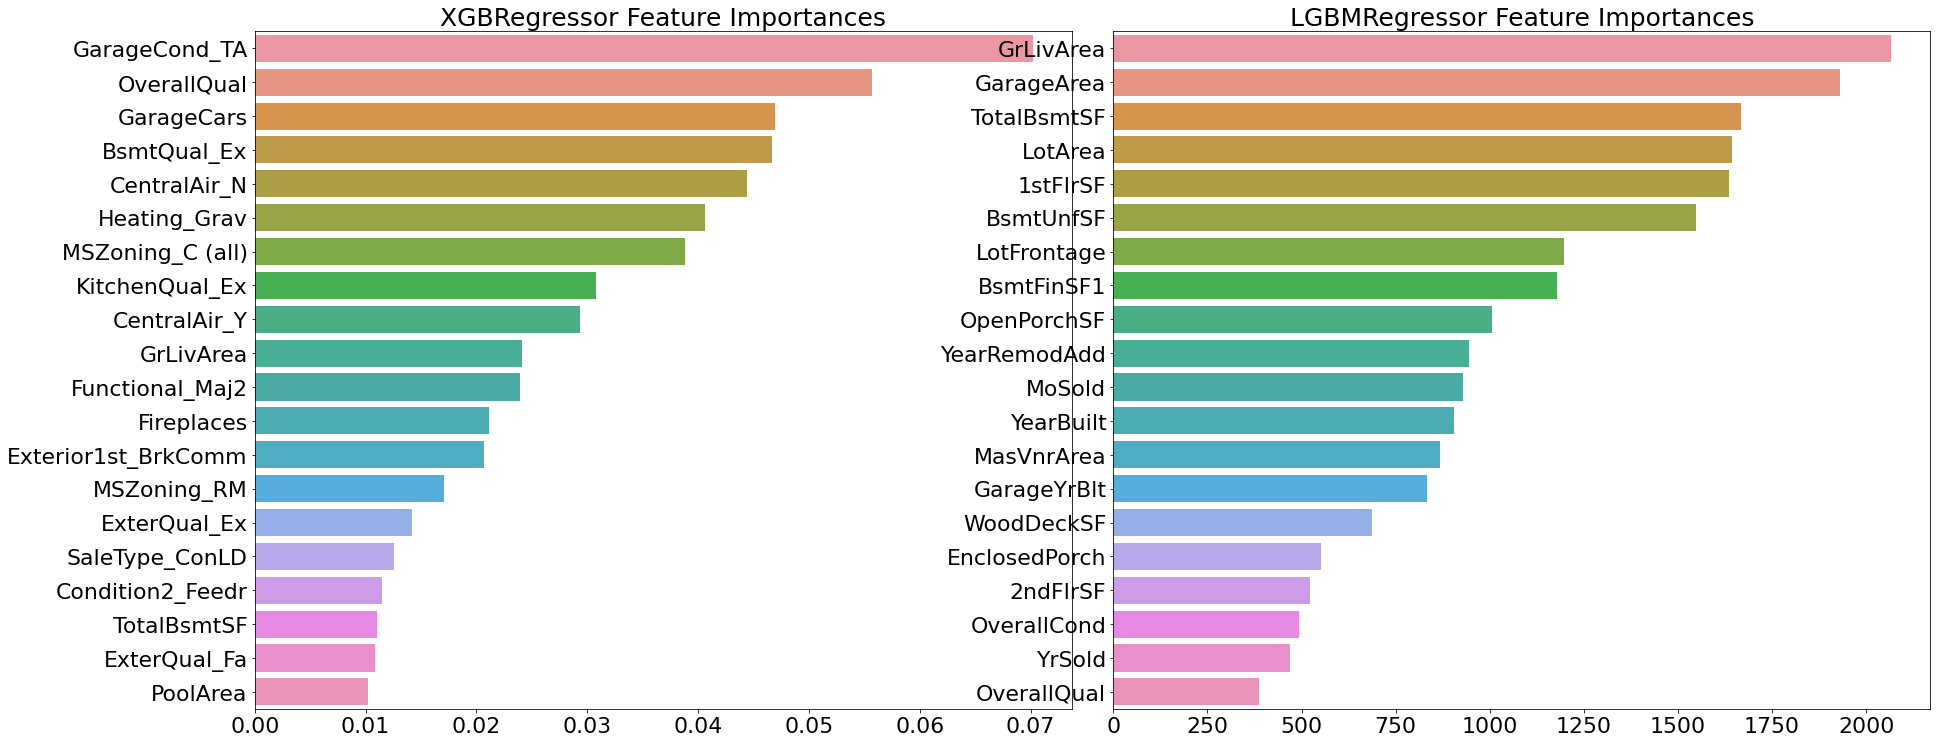

In [105]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도 값을 Series로 반환
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        
        # font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [xgb_reg, lgbm_reg]
visualize_ftr_importances(models)

## 회귀 모델의 예측 결과 혼합을 통한 최종 예측

- 개별 회귀 모델의 예측 결과값을 혼합해 이를 기반으로 최종 회귀 값 예측

    ex) A 모델과 B 모델의 예측값이 있을 때, A 모델 예측값의 40% + B 모델 예측값의 60% ⇒ 최종 회귀 값으로 예측

- 앞에서 구한 릿지 모델과 라쏘 모델을 서로 혼합해 보자

In [114]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, np.round(rmse, 4)))
        
# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 에측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
        'Ridge': ridge_pred,
        'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.1001
Ridge 모델의 RMSE: 0.1035
Lasso 모델의 RMSE: 0.1002


- 최종 혼합 모델의 RMSE가 개별 모델보다 성능 면에서 약간 개선됨
- 이번엔 XGBoost와 LightGBM을 혼합해 결과를 보자

In [115]:
xgb_reg = XGBRegressor(n_estimators=1000, leanring_rate=0.05,
                      colsample_bytree=0.5, subsample=0.8)

lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
        'Ridge': xgb_pred,
        'Lasso': lgbm_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.1111
Ridge 모델의 RMSE: 0.1357
Lasso 모델의 RMSE: 0.1015


## 스태킹 앙상블 모델을 통한 회귀 예측

- 4장 분류에서 소개한 스태킹 모델을 회귀에도 적용할 수 있음
- 스태킹 모델은 두 종류의 모델이 필요
    - 첫 번째는 개별적인 기반 모델, 두 번째는 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델
- 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것

- 최종 메타 모델이 학습할 피처 데이터 세트는 원본 학습 피처 세트로 학습한 개별 모델의 예측값을 스태킹 형태로 결합한 것

In [119]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

- get_stacking_base_datasets()는 인자로 개별 기반 모델, 원래 사용되는 학습 데이터와 테스트 데이터용 피처 데이터를 입력 받음
- 함수 내에서는 개별 모델이 K-폴드 세트로 설정된 폴드 세트 내부에서 원본의 학습 데이터를 다시 추출해 학습과 예측을 수행한 뒤 그 결과를 저장
- 저장된 예측 데이터는 추후에 메타 모델의 학습 피처 데이터 세트로 이용
- 또한 함수 내에서 폴드 세트 내부 학습 데이터로 학습된 개별 모델이 인자로 입력된 원본 테스트 데이터를 예측한 뒤, 예측 결과를 평균해 테스트 데이터로 생성


- 적용할 개별 모델: 릿지, 라쏘, XGBoost, LightGBM 총 4개 

In [120]:
# get_stacking_base_datsets()는 넘파이 ndarray를 인자로 사용->DataFrame을 넘파이로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [122]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용
meta_model_lasso = Lasso(alpha=0.0005)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값: ', np.round(rmse, 4))

스태킹 회귀 모델의 최종 RMSE 값:  0.0978


- RMSE가 가장 좋은 성능 평가를 보여줌
- 스태킹 모델은 분류뿐만 아니라 회귀에서 특히 효과적으로 사용될 수 있는 모델